In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode

In [2]:
def create_dataframe(path):
    total_df = pd.DataFrame()
    folders = os.listdir(path)
    for folder in folders:
        files = os.listdir(os.path.join(path, folder))
        for file in files:
            if file.endswith(".json"):
                df = pd.read_json(os.path.join(path,folder,file))
                total_df = pd.concat([total_df,df])
    return  total_df

total_df = create_dataframe("s3p")

In [3]:
total_df.head(4)

,id,fechaCaptura,expediente,institucionDependencia,particularSancionado,objetoContrato,autoridadSancionadora,tipoSancion,causaMotivoHechos,acto,resolucion,multa,inhabilitacion,observaciones,tipoFalta,responsableSancion,directorGeneral,apoderadoLegal,documentos,__v
0,9,2023-10-19T00:00:00Z,J040/2021,{'nombre': 'PODER JUDICIAL DEL ESTADO DE BAJA ...,{'nombreRazonSocial': 'ABRAHAM ERNESTO COSIO T...,SENTENCIA CONDENATORIA,JUEZ DE CONTROL,"[{'clave': 'I', 'valor': 'INHABILITADO'}, {'cl...",J040/2021,DELITO COMETIDO POR PARTICULAR,"{'sentido': 'SENTENCIA CONDENATORIA', 'url': '...","{'monto': 3047, 'moneda': {'clave': 'MXN', 'va...","{'plazo': '15 AÑOS 2 MESES', 'fechaInicial': '...",,NaN,NaN,NaN,NaN,NaN,NaN
1,39,2023-11-09T00:00:00Z,J157/2022,{'nombre': 'PODER JUDICIAL DEL ESTADO DE BAJA ...,"{'nombreRazonSocial': 'ALVARO CAMPOS OROZCO', ...",SENTENCIA CONDENATORIA,JUEZ DE CONTROL,"[{'clave': 'I', 'valor': 'INHABILITADO'}, {'cl...",J157/2022,DELITO COMETIDO POR PARTICULAR,"{'sentido': 'SENTENCIA CONDENATORIA', 'url': '...","{'monto': 19244, 'moneda': {'clave': 'MXN', 'v...","{'plazo': '4 AÑOS', 'fechaInicial': '2022-11-2...",,NaN,NaN,NaN,NaN,NaN,NaN
2,30,2023-11-09T00:00:00Z,J168/2019,{'nombre': 'PODER JUDICIAL DEL ESTADO DE BAJA ...,{'nombreRazonSocial': 'CRISTIAN SALVADOR AGUIL...,SENTENCIA CONDENATORIA,JUEZ DE CONTROL,"[{'clave': 'I', 'valor': 'INHABILITADO'}, {'cl...",J168/2019,DELITO COMETIDO POR PARTICULAR,"{'sentido': 'SENTENCIA CONDENATORIA', 'url': '...","{'monto': 0, 'moneda': {'clave': 'MXN', 'valor...","{'plazo': '12 AÑOS 6 MESES', 'fechaInicial': '...",,NaN,NaN,NaN,NaN,NaN,NaN
3,13,2023-10-19T00:00:00Z,J026/2020,{'nombre': 'PODER JUDICIAL DEL ESTADO DE BAJA ...,{'nombreRazonSocial': 'DIEGO ARMANDO VILCHES O...,SENTENCIA CONDENATORIA,JUEZ DE CONTROL,"[{'clave': 'I', 'valor': 'INHABILITADO'}, {'cl...",J026/2020,DELITO COMETIDO POR PARTICULAR,"{'sentido': 'SENTENCIA CONDENATORIA', 'url': '...",NaN,"{'plazo': '16 AÑOS 8 MESES', 'fechaInicial': '...",,NaN,NaN,NaN,NaN,NaN,NaN


## Resoluciones

In [4]:
resoluciones = []
for index,row in total_df.iterrows():
    resolucion = row['resolucion']
    if(type(resolucion) != float):
        if('sentido' in resolucion):
            resoluciones.append(unidecode(resolucion['sentido'].lower()))
        else:
            resoluciones.append("dato no proporcionado")
    else:
        resoluciones.append("dato no proporcionado")

print(f"Existen {len(np.unique(resoluciones))} resoluciones diferentes")
for resolucion in np.unique(resoluciones):
    if(len(resolucion) < 50):
      print(f"---- {resolucion}")
      

Existen 13 resoluciones diferentes
---- 
---- absolutoria
---- dato no proporcionado
---- sancion economica
---- sancionado con inhabilitacion y sancion economica
---- sancionatoria
---- sancionatoria con multa
---- sancionatoria con multa e inhabilitacin
---- sentencia condenatoria


## Actos

In [5]:
actos = []
for index,row in total_df.iterrows():
    acto = row['acto']
    if (type(acto) != float):
        actos.append(unidecode(acto.lower()))
    else:
        actos.append("Dato no proporcionado")

print(f"Existen {len(np.unique(actos))} actos delictivos diferentes")
for acto in np.unique(actos):
    if(len(acto) < 100):
        print(f"---- {acto}")

Existen 12 actos delictivos diferentes
---- 
---- Dato no proporcionado
---- dato no proporcionado
---- delito cometido por particular
---- denuncia
---- licitacion publica
---- soborno


## Sanciones

In [6]:
sanciones = []
for index,row in total_df.iterrows():
    tipo_sanciones = row['tipoSancion']
    if(type(tipo_sanciones) != float):
        for tipo in tipo_sanciones:
            if('clave' in tipo):
                sanciones.append(tipo['clave'])
            else:
                sanciones.append("Dato no proporcionado")
    else:
        sanciones.append("Dato no proporcionado")

print(f"Existen {len(np.unique(sanciones))} sanciones diferentes, y cada sancionado puede tener una lista de estas")
for sancion in np.unique(sanciones):
    print(f"---- {sancion}")
    
'''
Tipo de sanción aplicada. Valores permitidos:
I = INHABILITADO
M = MULTADO
S= SUSPENSIÓN DEL EMPLEO, CARGO O COMISIÓN
D= DESTITUCIÓN DEL EMPLEO, CARGO O COMISIÓN
O= OTRO
IRSC= INDEMNIZACIÓN RESARCITORIA
SE= SANCIÓN ECONÓMICA
'''

Existen 4 sanciones diferentes, y cada sancionado puede tener una lista de estas
---- I
---- M
---- O
---- SE


'\nTipo de sanción aplicada. Valores permitidos:\nI = INHABILITADO\nM = MULTADO\nS= SUSPENSIÓN DEL EMPLEO, CARGO O COMISIÓN\nD= DESTITUCIÓN DEL EMPLEO, CARGO O COMISIÓN\nO= OTRO\nIRSC= INDEMNIZACIÓN RESARCITORIA\nSE= SANCIÓN ECONÓMICA\n'

## Estadísticas multa


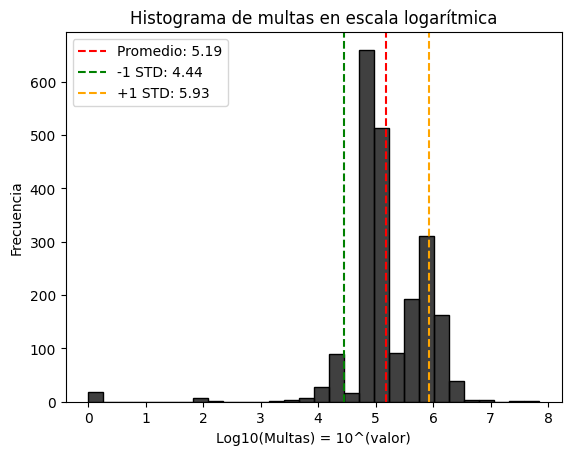

In [7]:
multas = []
for index,row in total_df.iterrows():
    multa = row['multa']
    if(type(multa) != float):
        if('monto' in multa):
            if(multa['monto'] is not None):
                multas.append(multa['monto'])


multas = np.array(multas)
multas = multas[np.where(multas > 0)]
log_multas = np.log10(multas)

promedio_log = np.mean(log_multas)
std_log = np.std(log_multas)
# Crear el histograma
plt.figure()
sns.histplot(log_multas, bins=30, color='black')
plt.axvline(promedio_log, color='red', linestyle='--', label=f'Promedio: {promedio_log:.2f}')
plt.axvline(promedio_log - std_log, color='green', linestyle='--', label=f'-1 STD: {promedio_log - std_log:.2f}')
plt.axvline(promedio_log + std_log, color='orange', linestyle='--', label=f'+1 STD: {promedio_log + std_log:.2f}')

# Personalizar el gráfico
plt.title("Histograma de multas en escala logarítmica")
plt.xlabel("Log10(Multas) = 10^(valor)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

## Inhabilitación

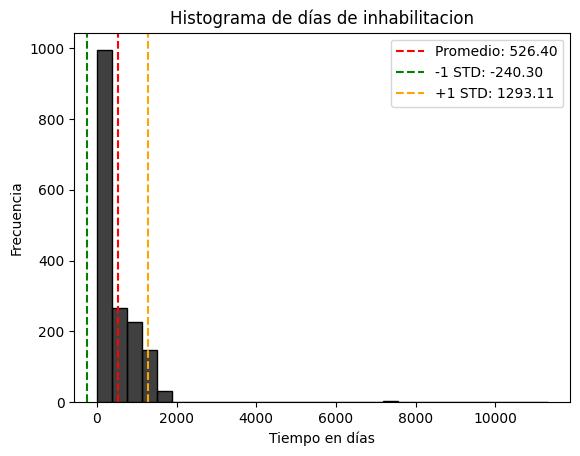

In [8]:
duraciones = []
for index,row in total_df.iterrows():
    inhabilitacion = row['inhabilitacion']
    if(type(inhabilitacion) != float):
        if('fechaInicial' in inhabilitacion and 'fechaFinal' in inhabilitacion and 'plazo' in inhabilitacion):
            if(inhabilitacion['fechaInicial'] != "-" and inhabilitacion['fechaInicial'] != " " and inhabilitacion['fechaFinal'] != "-" and inhabilitacion['fechaFinal'] != " "):
                try:
                    fechaInicial = pd.to_datetime(inhabilitacion['fechaInicial'])
                    fechaFinal = pd.to_datetime(inhabilitacion['fechaFinal'])
                    duracion = (fechaFinal - fechaInicial).days
                    if(type(duracion) != float):
                        duraciones.append(duracion)
                except Exception as e:
                    pass
            elif(inhabilitacion['plazo'] != 'Dato no proporcionado'):
                duraciones.append(inhabilitacion['plazo'])


promedio = np.mean(duraciones)
std = np.std(duraciones)
plt.figure()
sns.histplot(duraciones, bins=30, color='black')
plt.axvline(promedio, color='red', linestyle='--', label=f'Promedio: {promedio:.2f}')
plt.axvline(promedio - std, color='green', linestyle='--', label=f'-1 STD: {promedio - std:.2f}')
plt.axvline(promedio + std, color='orange', linestyle='--', label=f'+1 STD: {promedio + std:.2f}')

# Personalizar el gráfico
plt.title("Histograma de días de inhabilitacion")
plt.xlabel("Tiempo en días")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()